In [2]:
from jax import jit, jacfwd, jacrev
import jax.random as jr
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np
import gaussfiltax.static_utils as ts
import gaussfiltax.utils as utils
import scienceplots
from typing import NamedTuple
from jaxtyping import Float32
from itertools import count
from tensorflow_probability.substrates.jax.distributions import MultivariateNormalFullCovariance as MVN
import tensorflow_probability.substrates.jax.distributions as tfd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

In [62]:
f = lambda x : jnp.dot(x, x)

dx = 2
Nprt = 100
mu = jnp.array([0.00001, 0.00001])
cov = 1 * jnp.eye(2)
Q = 0.1 * jnp.eye(1)
y0 = 1.0
hessian = jit(jacfwd(jacrev(f)))
hess = hessian(mu)
Delta =  0.1 * cov #utils.sdp_opt(2, cov, hess, 1, 0.01)
model = ts.AugmentedJointApproximation(Nprt, f, dx, 1, mu, cov, Q, Delta)
keys = map(jr.PRNGKey, count(11))
posterior = model.return_posterior([y0], keys)[0]
grads = model.return_posterior([y0], keys)[1]

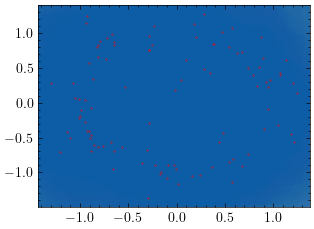

In [63]:
plt.style.use('science')
ax = plt.gca()
p = posterior.weights
p = np.asarray(p).astype('float64')
p = p / np.sum(p)
idx = np.random.choice(Nprt, 100, replace=True, p=p)
for i in range(Nprt):
    ts.plot_cov_ellipse(posterior.covs[i], posterior.means[i], nstd=2, ax=ax, alpha=5*p[i])
plt.scatter(posterior.means[:, 0], posterior.means[:, 1], s=0.1, c='r')
plt.show()

In [56]:
print(posterior.means[33])

[-7.29663181 64.08931732]
